# Predicting Loan Approval


### What could i have done more during data collection phase
### This dataset could have been even more better if it had more features such as :- 
### Total_income_before_5Years , Total_income_before_3Years, Total_income_before_1Year(This should help us determine the growth of income over the years),Net_Worth_before_5Years , Net_Worth_before_3Years, Net_Worth_before_1Years, Current_Net_worth(This should help us determine how the applicant is regarding handling his/her money, how they are spending, saving and  investing it) , No_of_Health_Policies , No_of_insurance_Policies(Security against future unknown events), marital_status, No_of_kids(Studies have shown they have a high co-relation to their ability to pay back)
### Let's start working on the present dataset and go through all the features we have and make an ML Algorithm which provides us with the highest accuracy.

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import xgboost as xgb
from pyswarm import pso
from tensorflow.keras.regularizers import l2
from multiprocessing import Pool, cpu_count
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/Users/divyapandey/Desktop/Internship/House Of Couton/Loan_Details.csv')

In [3]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [4]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [5]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [6]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [7]:
len(df['emp_title'].unique())

173106

In [8]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [9]:
len(df['emp_length'].unique())

12

In [10]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [11]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [12]:
df['issue_d'].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [13]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [14]:
len(df['purpose'].unique())

14

In [15]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [16]:
len(df['title'].unique())

48817

In [17]:
df['earliest_cr_line'].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [18]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [19]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## 0.Loan Amount
### The amount of money the burrower wants to loan.(Dollar)
## 1.Term
### The duration over which the loan will be repaid.There are only two categories.(36 Months, 60 Months)
## 2.Interest Rate
### The interest rate for the loan.(Percentage)
## 3.Installments
### Money to pay back on a monthly basis
## 4.Grade
### Alphabet assigned to demonstrate credit worthiness.(A-G)
## 5.Sub_Grade
### sub parts of Alphabets assigned to demonstrate credit worthiness.(A1-G5)

## 6.Employee's Titile
### The Title people have at their jobs. This won't be a good feature because there are so many different titles(173106)
## 7.Employee length
### The length of the employement. There are only 12 categories and can be used as an important feature.
## 8.Home Ownership
### It shows whether the person owns a house or does not own a house.there are 6 different Categories.
## 9.Annual Income 
### The amount of money the person earns in a year(Dollar)
## 10.Verification Status
### The annual income is verified. There are 3 categories (Not Verified, Source Verified, Verified).

## 11.Issue Date
### The month which the loan was funded (Month-Year).
## 12.Loan Status
### Current status of the loan. there are 2 categories(Fully Paid, Charged Off)
## 13.Purpose
### A category provided by the borrower for the loan request. There are 14 Categories.
## 14.Title
### The loan title provided by the borrower.This won't be a good feature as there are 48817 categories.
## 15.DTI
### Debt-to-income ratio (DTI) is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

## 16.Earliest credit line
### The month the borrower's earliest reported credit line was opened.(Month-Year)
## 17.Open Account
### The number of open credit lines in the borrower's credit file.
## 18.Public Records
### Number of derogatory public records.
## 19.Revolving Balance
### Total credit Revolving Balance.(Dollar)
## 20.Revolving line utilization rate
### The amount of credit the borrower is using relative to all available revolving credit.(Dollar)
## 21.Total Account
### The total number of credit lines currently in the borrower's credit file.
## 22.Initial List Status
### The initial listing status of the loan.there are two categories(w,f).

## 23. Application Type
### Indicates whether the loan is an individual application or a joint application with two co-borrowers.(INDIVIDUAL,JOINT,DIRECT_PAY)
## 24. Mortgage account
### Number of mortgage accounts.
## 25. Public Record Bankruptcies
### Number of public record bankruptcies.
## 26. Address
### The Address of the borrower.

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Exploratory Data Analysis

<Axes: xlabel='loan_status', ylabel='count'>

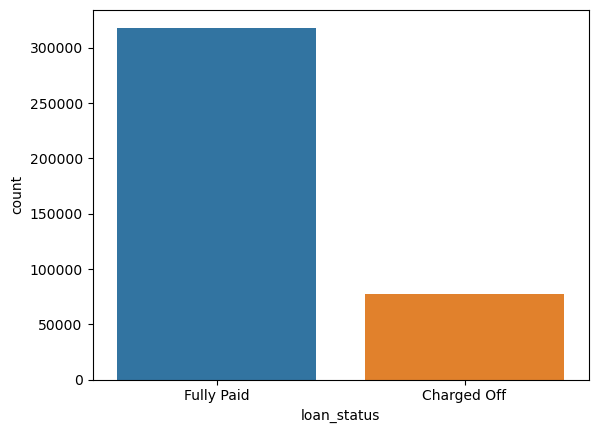

In [22]:
sns.countplot(x='loan_status',data=df)

<Axes: xlabel='term', ylabel='count'>

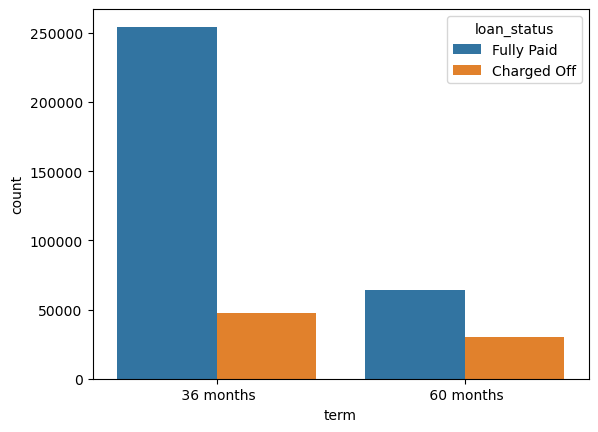

In [23]:
sns.countplot(x='term',data=df,hue='loan_status')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

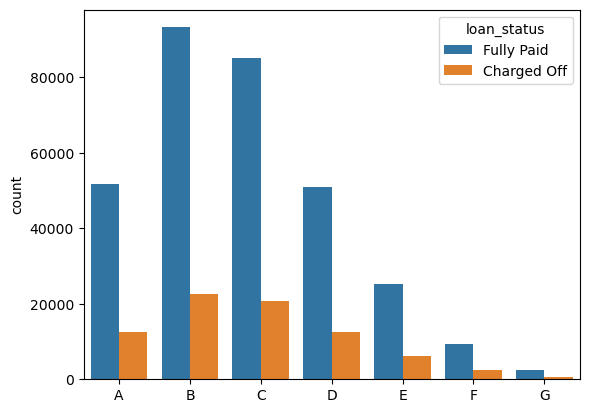

In [24]:
sns.countplot(x=sorted(df['grade']),data=df,hue='loan_status')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

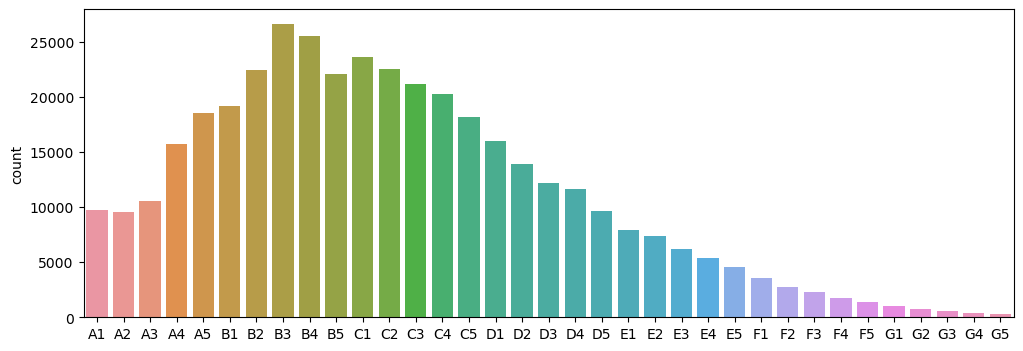

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x=sorted(df['sub_grade']),data=df)

<Axes: xlabel='emp_length', ylabel='count'>

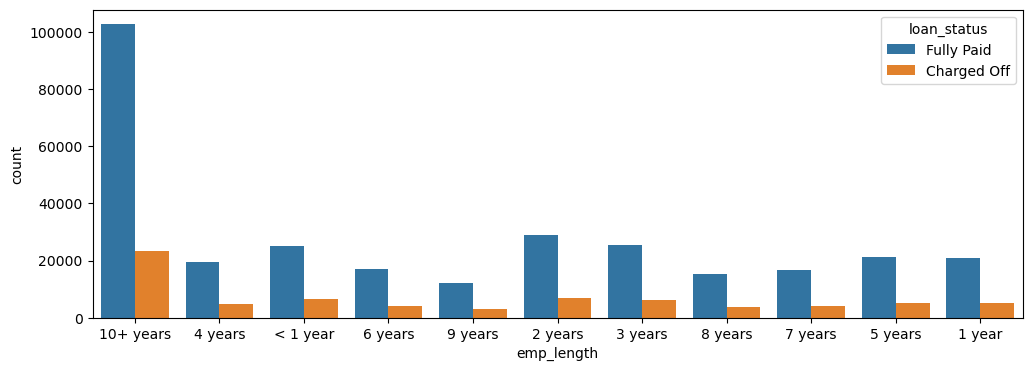

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,hue='loan_status')

<Axes: xlabel='home_ownership', ylabel='count'>

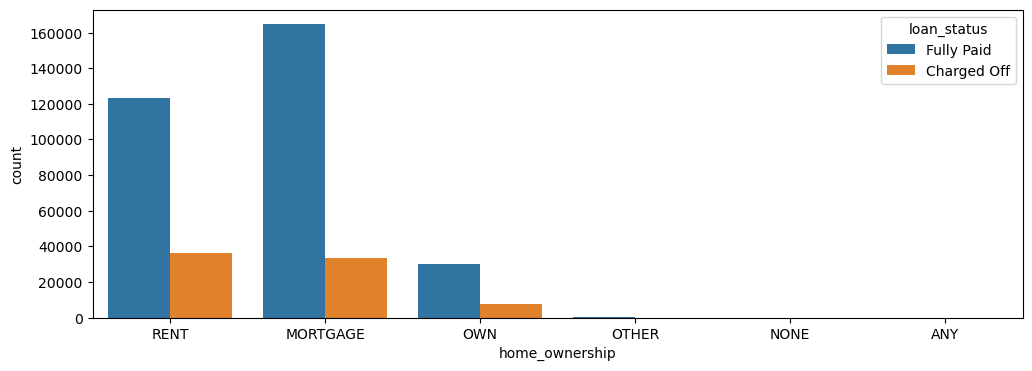

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(x='home_ownership',data=df,hue='loan_status')

In [28]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

<Axes: xlabel='home_ownership', ylabel='count'>

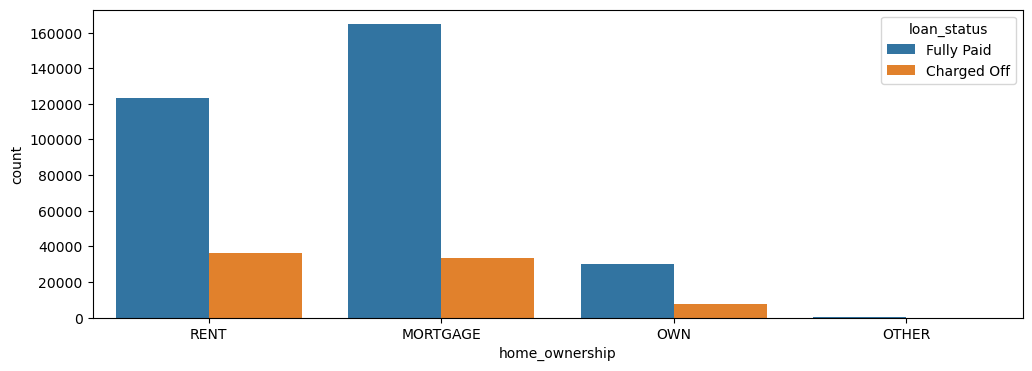

In [29]:
plt.figure(figsize=(12,4))
sns.countplot(x='home_ownership',data=df,hue='loan_status')

<Axes: xlabel='verification_status', ylabel='count'>

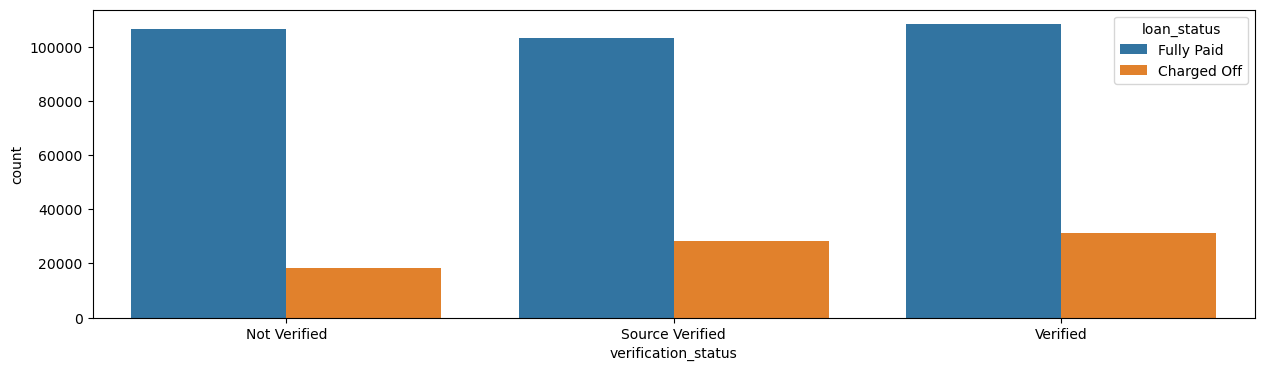

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(x='verification_status',data=df,hue='loan_status')

<Axes: xlabel='purpose', ylabel='count'>

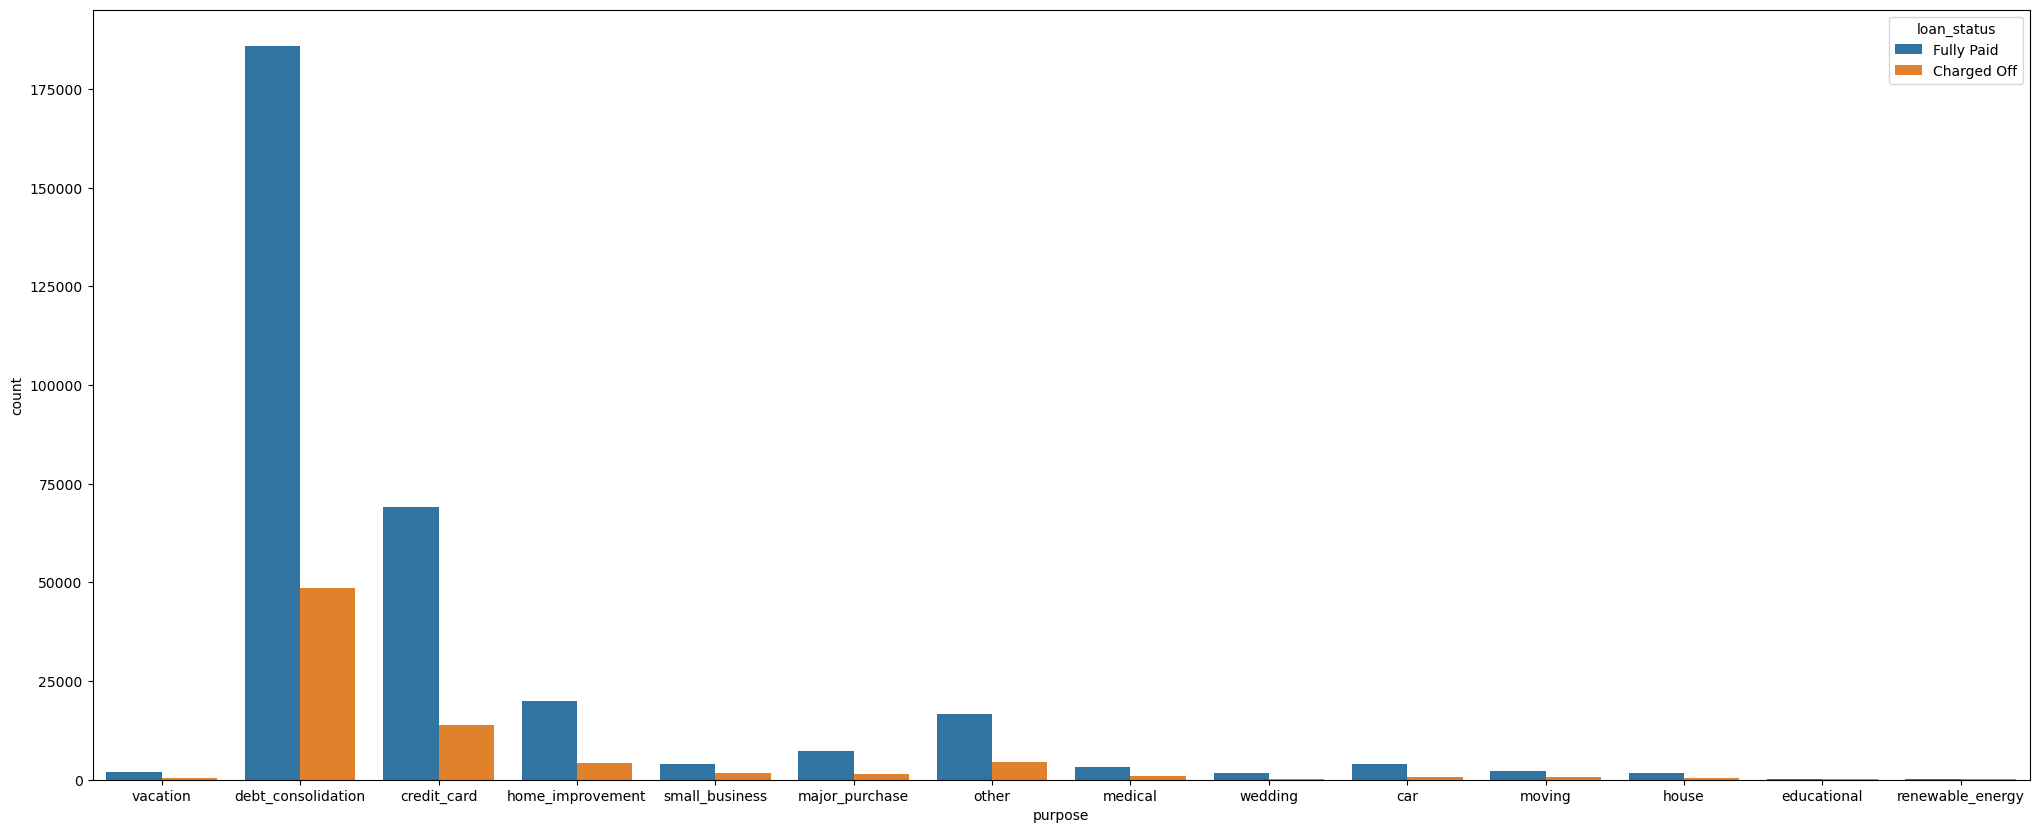

In [31]:
plt.figure(figsize=(25,10))
sns.countplot(x='purpose',data=df,hue='loan_status')

<Axes: xlabel='initial_list_status', ylabel='count'>

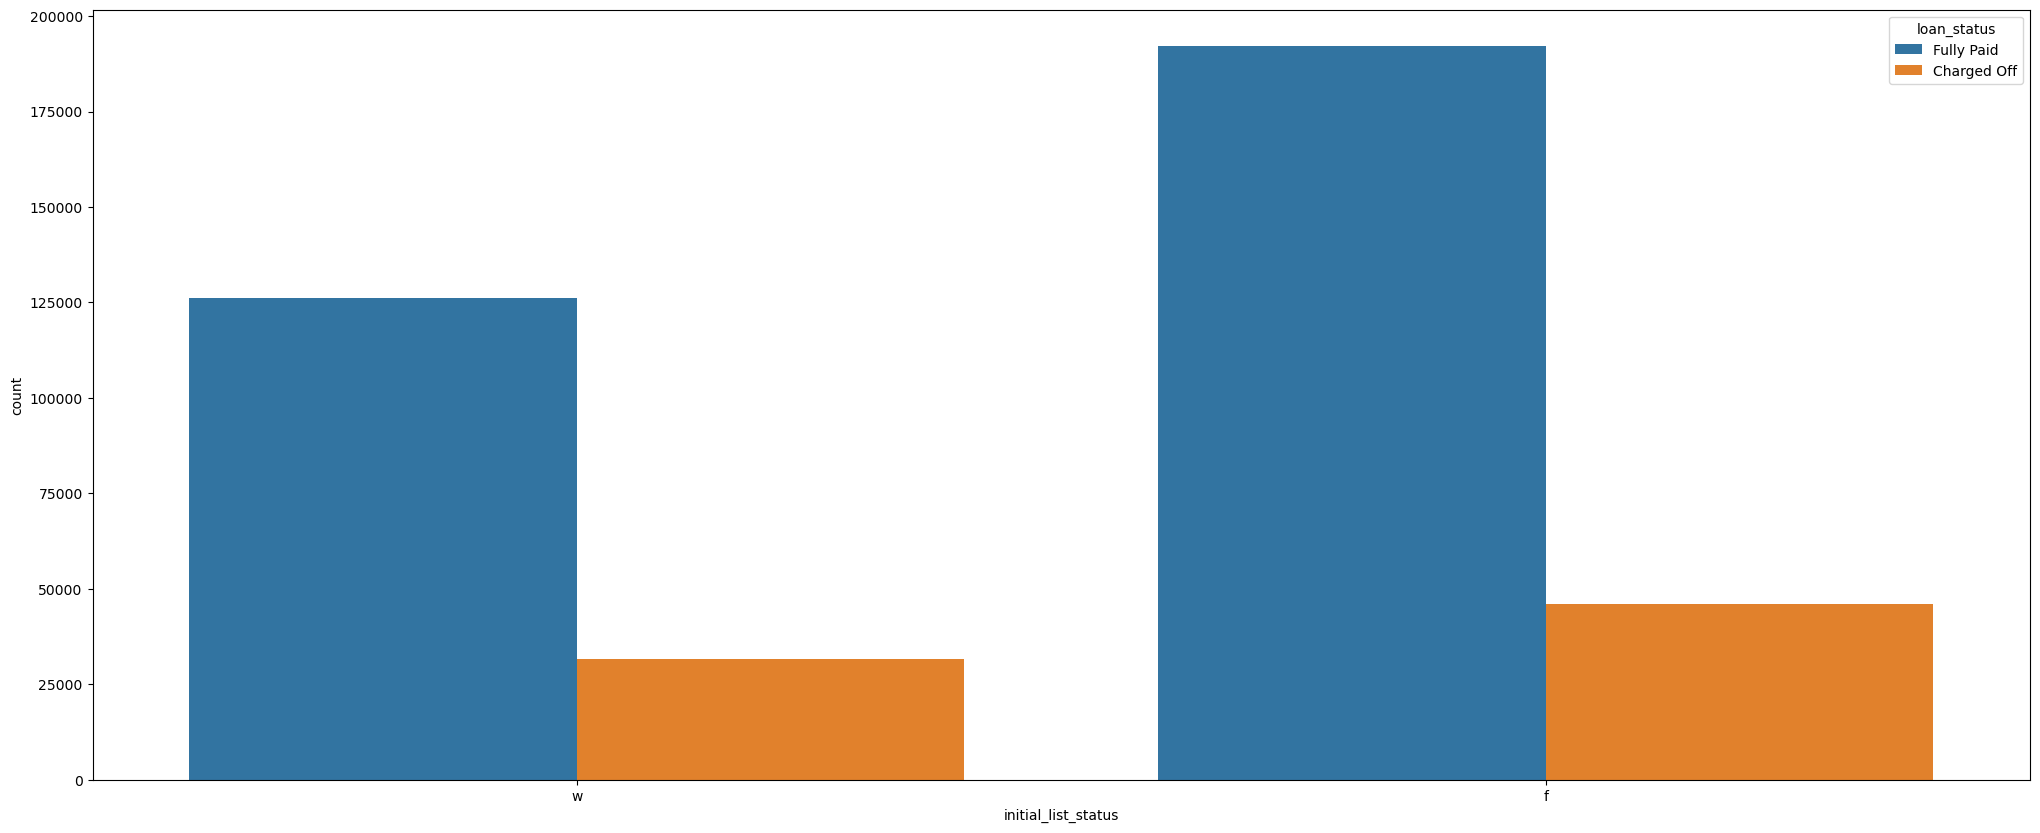

In [32]:
plt.figure(figsize=(25,10))
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

<Axes: xlabel='application_type', ylabel='count'>

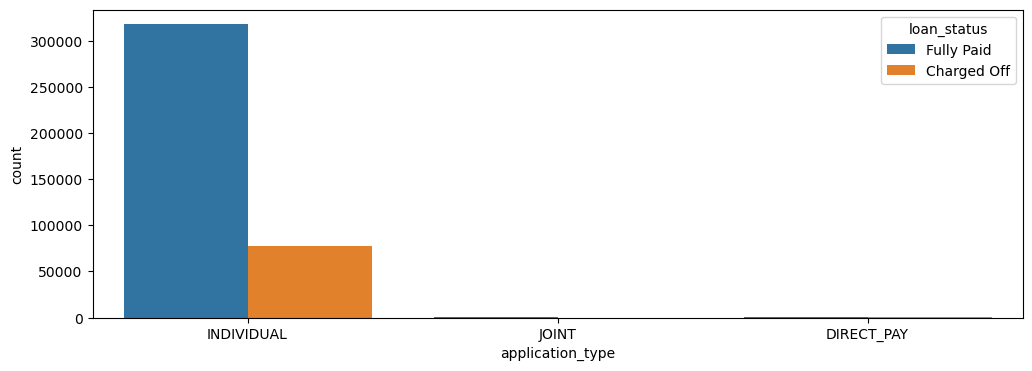

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(x='application_type',data=df,hue='loan_status')

# Data Preprocessing

In [34]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [35]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [36]:
df = df.drop('emp_title',axis=1)

In [37]:
EL_CO = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [38]:
EL_FP = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [39]:
EL = EL_CO/EL_FP

In [40]:
EL

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [41]:
df = df.drop('emp_length',axis=1)

In [42]:
df['mort_acc']=df['mort_acc'].apply(pd.to_numeric, errors='coerce')

In [43]:
df_Numerical_Column = df.select_dtypes(include=[np.number])

In [44]:
df_Numerical_Column.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


Help on Axes in module matplotlib.axes._axes object:

class Axes(matplotlib.axes._base._AxesBase)
 |  Axes(fig, *args, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, **kwargs)
 |  
 |  An Axes object encapsulates all the elements of an individual (sub-)plot in
 |  a figure.
 |  
 |  It contains most of the (sub-)plot elements: `~.axis.Axis`,
 |  `~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
 |  and sets the coordinate system.
 |  
 |  Like all visible elements in a figure, Axes is an `.Artist` subclass.
 |  
 |  The `Axes` instance supports callbacks through a callbacks attribute which
 |  is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
 |  are 'xlim_changed' and 'ylim_changed' and the callback will be called with
 |  func(*ax*) where *ax* is the `Axes` instance.
 |  
 |  .. note::
 |  
 |      As a user, you do not instantiate Axes directly, but use Axes creation
 |     

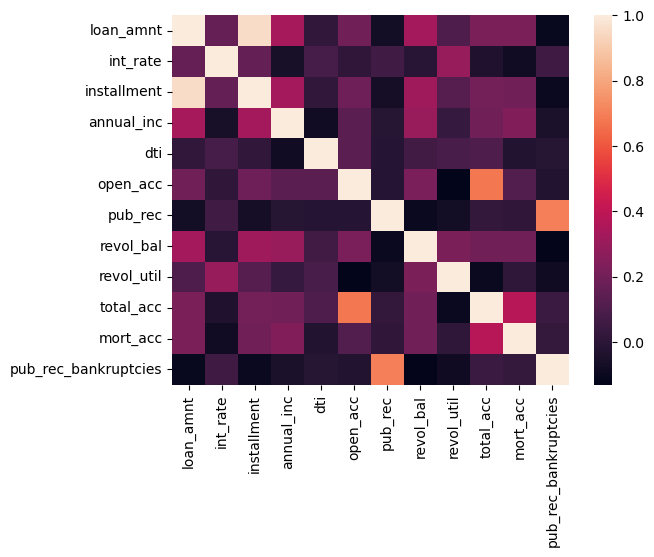

In [45]:
help(sns.heatmap(df_Numerical_Column.corr()))

<Axes: >

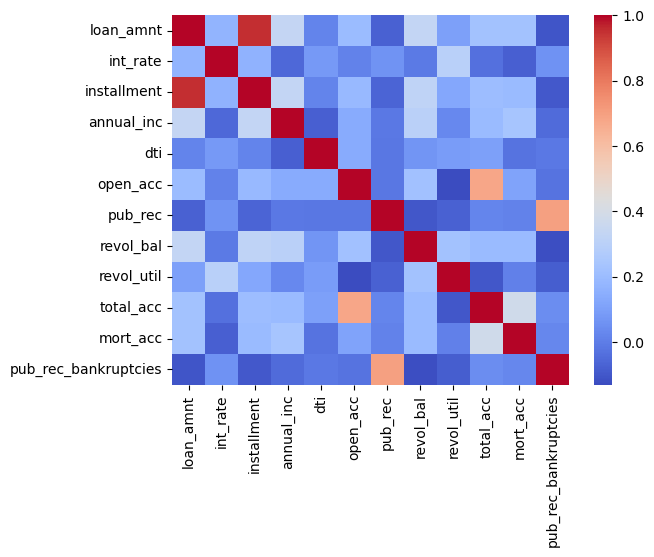

In [46]:
sns.heatmap(df_Numerical_Column.corr(),cmap='coolwarm')

In [47]:
df['mort_acc'].mean()

1.8139908160844138

In [48]:
def mort_acc(mort_acc):
    if np.isnan(mort_acc):
        return 2
    else:
        return mort_acc

In [49]:
df['mort_acc'] = df.apply(lambda x: mort_acc(x['mort_acc']), axis=1)

In [50]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                   1756
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               276
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies     535
address                    0
dtype: int64

In [51]:
df=df.drop('title',axis=1)

In [52]:
df = df.dropna()

In [53]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

# Categorical Features

In [54]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [55]:
df = df.drop('grade',axis=1)

Because Subgrade includes the information provided by the grade 

In [56]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [57]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [58]:
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummies],axis=1)

In [59]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = pd.concat([df,dummies],axis=1)

In [60]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewabl

In [61]:
df.select_dtypes(['object']).columns

Index(['term', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [62]:
df=df.drop(['verification_status', 'application_type','initial_list_status','purpose' ],axis=1)

In [63]:
df.select_dtypes(['object']).columns

Index(['term', 'home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [64]:
df=df.drop(['issue_d' ],axis=1)

In [65]:
dummies_1 = pd.get_dummies(df['home_ownership' ],drop_first=True)
df = pd.concat([df,dummies_1],axis=1)

In [66]:
df=df.drop(['home_ownership' ],axis=1)

In [67]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [68]:
df['cr_year']=df['earliest_cr_line'].apply(lambda x:int(x[-4:]))

In [69]:
df['cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: cr_year, Length: 395219, dtype: int64

In [70]:
df = df.drop('earliest_cr_line',axis=1)

In [71]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [72]:
df['zip_code'] = df['address'].apply(lambda x:x[-5:])

In [73]:
df = df.drop('address',axis=1)

In [74]:
df.select_dtypes(['object']).columns

Index(['term', 'loan_status', 'zip_code'], dtype='object')

In [75]:
dummies_2 = pd.get_dummies(df['zip_code'],drop_first=True)

In [76]:
df = pd.concat([df,dummies_2],axis=1)

In [77]:
df = df.drop('zip_code',axis=1)

In [78]:
df.select_dtypes(['object']).columns

Index(['term', 'loan_status'], dtype='object')

In [79]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT',
       'cr_year', '05113', '11650', '22690',

In [80]:
dummies_3 = pd.get_dummies(df['loan_status'],drop_first=True)

In [81]:
df = df.drop('loan_status',axis=1)

In [82]:
df = pd.concat([df,dummies_3],axis=1)

In [83]:
df['term'] = df['term'].apply(pd.to_numeric, errors='coerce')

In [84]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT',
       'cr_year', '05113', '11650', '22690', '29597', '30723', '48

# ANN with PSO

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
df_for_Model = df.drop('Fully Paid',axis=1)

In [87]:
X = df_for_Model.values
y = df['Fully Paid'].values

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
X_train = scaler.fit_transform(X_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [92]:
X_test = scaler.transform(X_test)

In [93]:
X_train

array([[0.06153846,        nan, 0.25983638, ..., 0.        , 0.        ,
        0.        ],
       [0.24102564,        nan, 0.10050643, ..., 0.        , 0.        ,
        0.        ],
       [0.13846154,        nan, 0.32528243, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19358974,        nan, 0.16945851, ..., 0.        , 0.        ,
        0.        ],
       [0.28205128,        nan, 0.4253993 , ..., 0.        , 0.        ,
        0.        ],
       [0.87179487,        nan, 0.57148422, ..., 0.        , 0.        ,
        0.        ]])

In [94]:
X_test

array([[0.35384615,        nan, 0.51305025, ..., 0.        , 0.        ,
        0.        ],
       [0.76923077,        nan, 0.47721075, ..., 0.        , 0.        ,
        0.        ],
       [0.53846154,        nan, 0.10011687, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.61538462,        nan, 0.0455785 , ..., 0.        , 0.        ,
        0.        ],
       [0.38076923,        nan, 0.64939618, ..., 0.        , 0.        ,
        0.        ],
       [0.25128205,        nan, 0.17257499, ..., 0.        , 1.        ,
        0.        ]])

In [95]:
y_train

array([ True,  True,  True, ...,  True,  True,  True])

In [96]:
y_test

array([ True,  True,  True, ...,  True,  True, False])

In [97]:
len(y_train)

264796

In [98]:
len(y_test)

130423

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [100]:
X_train.shape

(264796, 78)

In [101]:
import numpy as np

print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("Infinite values in X_train:", np.isinf(X_train).sum())
print("Infinite values in X_test:", np.isinf(X_test).sum())

NaN values in X_train: 264796
NaN values in X_test: 130423
Infinite values in X_train: 0
Infinite values in X_test: 0


In [102]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") 
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [103]:
from collections import Counter

print("Class distribution in y_train:", Counter(y_train))
print("Class distribution in y_test:", Counter(y_test))

Class distribution in y_train: Counter({True: 212937, False: 51859})
Class distribution in y_test: Counter({True: 104759, False: 25664})


In [104]:
from imblearn.over_sampling import SMOTE

In [105]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [106]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [107]:
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train))

Class distribution after SMOTE: Counter({True: 212937, False: 212937})


In [133]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [134]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [147]:
def build_ann(params):
    learning_rate, neurons, layers, dropout = params
    neurons = int(neurons)
    layers = int(layers)
    
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(dropout))
    for _ in range(layers - 1):
         model.add(Dense(neurons, activation='relu'))
         model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [148]:
import time

fitness_history = []  

def ann_objective(params):
    start_time = time.time()
    learning_rate, neurons, layers, dropout = params
    print(f"\nEvaluating ANN with params: LR={learning_rate:.5f}, Neurons={int(neurons)}, Layers={int(layers)}, Dropout={dropout:.2f}")
    model = build_ann(params)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.1)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    fitness_score = 1 - acc
    fitness_history.append(fitness_score)
    end_time = time.time()
    print(f"→ Accuracy: {acc:.4f}, Loss: {loss:.4f}, Fitness Score: {fitness_score:.4f}, Time Taken: {end_time - start_time:.2f} sec")
    return fitness_score


In [149]:
num_workers = cpu_count()  
print(f"Using {num_workers} cores for parallel processing.")

Using 10 cores for parallel processing.


In [152]:
lb = [0.005, 16, 2, 0.05]   
ub = [0.02, 80, 4, 0.2]  

def parallel_objective(x):
    return ann_objective(x)  

if __name__ == "__main__":
    with Pool(num_workers) as p:
        best_params, _ = pso(
            parallel_objective, lb, ub,
            swarmsize=10,  
            maxiter=75 
        )

    print("Optimized PSO completed.")
    print("Best Parameters:", best_params)



Evaluating ANN with params: LR=0.00911, Neurons=49, Layers=3, Dropout=0.18
→ Accuracy: 0.7761, Loss: 0.3459, Fitness Score: 0.2239, Time Taken: 45.16 sec

Evaluating ANN with params: LR=0.00608, Neurons=64, Layers=3, Dropout=0.15
→ Accuracy: 0.8225, Loss: 0.3228, Fitness Score: 0.1775, Time Taken: 47.52 sec

Evaluating ANN with params: LR=0.01737, Neurons=57, Layers=3, Dropout=0.11
→ Accuracy: 0.8205, Loss: 0.3541, Fitness Score: 0.1795, Time Taken: 46.56 sec

Evaluating ANN with params: LR=0.00807, Neurons=51, Layers=3, Dropout=0.16
→ Accuracy: 0.7964, Loss: 0.3458, Fitness Score: 0.2036, Time Taken: 45.54 sec

Evaluating ANN with params: LR=0.01511, Neurons=18, Layers=2, Dropout=0.08
→ Accuracy: 0.7881, Loss: 0.3397, Fitness Score: 0.2119, Time Taken: 36.77 sec

Evaluating ANN with params: LR=0.01425, Neurons=60, Layers=3, Dropout=0.08
→ Accuracy: 0.7902, Loss: 0.3490, Fitness Score: 0.2098, Time Taken: 47.03 sec

Evaluating ANN with params: LR=0.01122, Neurons=29, Layers=3, Dropout

In [153]:
best_params

array([1.67884616e-02, 3.62479788e+01, 4.00000000e+00, 1.46838621e-01])

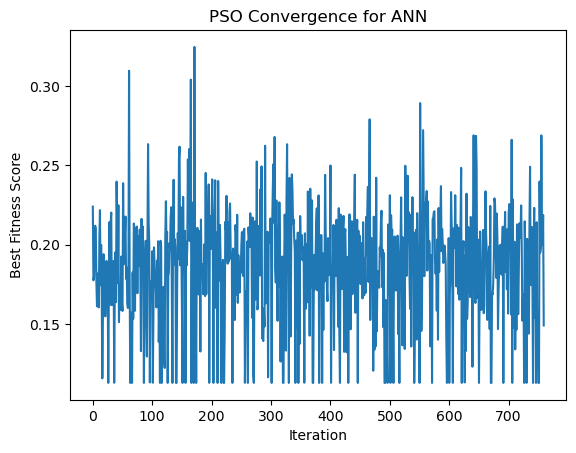

In [154]:
plt.plot(fitness_history)
plt.xlabel("Iteration")
plt.ylabel("Best Fitness Score")
plt.title("PSO Convergence for ANN")
plt.show()

# Normal ANN

In [135]:
model_ANN = Sequential()
model_ANN.add(Dense(78,  activation='relu'))
model_ANN.add(Dropout(0.5))
model_ANN.add(Dense(78,  activation='relu'))
model_ANN.add(Dropout(0.3))
model_ANN.add(Dense(39, activation='relu'))
model_ANN.add(Dropout(0.5))
model_ANN.add(Dense(39, activation='relu'))
model_ANN.add(Dropout(0.3))
model_ANN.add(Dense(19, activation='relu'))
model_ANN.add(Dropout(0.3))
model_ANN.add(Dense(10, activation='relu'))
model_ANN.add(Dropout(0.2))
model_ANN.add(Dense(1,activation='sigmoid'))
model_ANN.compile(loss='binary_crossentropy', optimizer='adam')

In [136]:
264796/1024

258.58984375

In [137]:
model_ANN.fit(x=X_train, y=y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test))

Epoch 1/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5655 - val_loss: 0.3348
Epoch 2/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3742 - val_loss: 0.3364
Epoch 3/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3680 - val_loss: 0.3319
Epoch 4/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3637 - val_loss: 0.3534
Epoch 5/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3627 - val_loss: 0.3416
Epoch 6/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3616 - val_loss: 0.3361
Epoch 7/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3595 - val_loss: 0.3323
Epoch 8/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3583 - val_loss: 0.3319
Epoch 9/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3581 - val_loss: 0.3316
Epoch 10/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3567 - val_loss: 0.3347
Epoch 11/100
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3553 - val_loss: 0.3385
Epoch 12/100
832/832 ━━━━━━━━━━━━━━━━━━━━

In [139]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [140]:
predictions_ANN = model_ANN.predict(X_test)

predictions_ANN = (predictions_ANN > 0.5).astype(int).flatten()

4076/4076 ━━━━━━━━━━━━━━━━━━━━ 1s 214us/step


In [141]:
print(classification_report(y_test, predictions_ANN))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64     25664
           1       0.92      0.88      0.90    104759

    accuracy                           0.84    130423
   macro avg       0.76      0.79      0.77    130423
weighted avg       0.86      0.84      0.85    130423



# Gradient Boosting Machine (GBM)

In [124]:
from xgboost import XGBClassifier

In [125]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |  
 |      max_depth :  typing.Optional[int]
 |  
 |          Maximum tree depth for base learners.
 |  
 |      max_leaves : typing.Optional[int]
 |  
 |          Maximum number of leaves; 0 indicates no limit.
 |  
 |      max_bin : typing.Optional[int]
 |  
 |          If using histogram-based algorithm, maximum number of bins per feature
 |  
 |      grow_policy : typing.Optional[str]
 |  
 |          Tree growing policy.
 |  
 |   

In [142]:
XGB_model = XGBClassifier(random_state=101, use_label_encoder=False, eval_metric='logloss')

In [143]:
XGB_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:18:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=101, ...)

In [144]:
Predictions_XGB = XGB_model.predict(X_test)

In [145]:
confusion_matrix(y_test, Predictions_XGB)

array([[ 12587,  13077],
       [  1575, 103184]])

In [146]:
print(classification_report(y_test, Predictions_XGB))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63     25664
           1       0.89      0.98      0.93    104759

    accuracy                           0.89    130423
   macro avg       0.89      0.74      0.78    130423
weighted avg       0.89      0.89      0.87    130423



# GBM with PSO

In [ ]:
fitness_history_gbm=[]
def gbm_objective(params):
    learning_rate, max_depth, n_estimators, subsample, colsample = params
    print("Evaluating: LR={:.5f}, max_depth={}, n_estimators={}, subsample={:.2f}, colsample={:.2f}".format(
        learning_rate, int(max_depth), int(n_estimators), subsample, colsample))
    
    model = xgb.XGBClassifier(
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        n_estimators=int(n_estimators),
        subsample=subsample,
        colsample_bytree=colsample,
        eval_metric="logloss",
        n_jobs=-1
    )
    model.fit(X_train, y_train, 
              eval_set=[(X_test, y_test)], 
              verbose=False)
    acc = model.score(X_test, y_test)
    fitness_score = 1 - acc
    print("Result: Accuracy = {:.4f}, Fitness = {:.4f}\n".format(acc, fitness_score))
    fitness_history_gbm.append(fitness_score)
    
    return fitness_score


In [ ]:
lb = [0.01, 3, 100, 0.5, 0.5] 
ub = [0.3, 10, 500, 1, 1]
best_params_gbm, _ = pso(gbm_objective, lb, ub, swarmsize=5, maxiter=50)

In [ ]:
best_params_gbm

In [ ]:
plt.plot(fitness_history_gbm)
plt.xlabel("Iteration")
plt.ylabel("Best Fitness Score")
plt.title("PSO Convergence for XGB")
plt.show()

# PSO implementation 

In [156]:
final_ann = build_ann(best_params)
final_ann.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
y_pred_ann = (final_ann.predict(X_test) > 0.5).astype(int)
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))

Epoch 1/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 6s 371us/step - accuracy: 0.7742 - loss: 0.3940
Epoch 2/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 375us/step - accuracy: 0.7749 - loss: 0.3910
Epoch 3/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 369us/step - accuracy: 0.7780 - loss: 0.3895
Epoch 4/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 368us/step - accuracy: 0.7709 - loss: 0.3919
Epoch 5/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 367us/step - accuracy: 0.7727 - loss: 0.3915
Epoch 6/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 377us/step - accuracy: 0.7689 - loss: 0.3893
Epoch 7/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 373us/step - accuracy: 0.7546 - loss: 0.3982
Epoch 8/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 368us/step - accuracy: 0.7130 - loss: 0.4017
Epoch 9/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 368us/step - accuracy: 0.7128 - loss: 0.4018
Epoch 10/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 368us/step - accuracy: 0.7128 - loss: 0.4012
Epoch 11/100
13309/13309 ━━━━━━━━━━━━━━━━━━━━ 5s 369us/step - accurac

In [ ]:
final_gbm = xgb.XGBClassifier(learning_rate=best_params_gbm[0], max_depth=int(best_params_gbm[1]),
                              n_estimators=int(best_params_gbm[2]), subsample=best_params_gbm[3],
                              colsample_bytree=best_params_gbm[4])
final_gbm.fit(X_train, y_train)
y_pred_gbm = final_gbm.predict(X_test)
print("GBM Accuracy:", accuracy_score(y_test, y_pred_gbm))